In [79]:
fn = "results_benchmark-latest.csv"

In [80]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
%matplotlib inline

In [81]:
raw_df = pd.read_csv(fn)

In [125]:
methods = "sos rrt rrt_tv nlp".split()
df = raw_df[["n", "obs_seed", "speed_obs"] +\
        ["valid_"+key for key in methods] +\
        ["length_"+key for key in methods] +\
        ["time_"+key for key in methods] +\
        ["smooth_"+key for key in methods]]
df = df.sort_values(["speed_obs", "n"]).reset_index()
df

,index,n,obs_seed,speed_obs,valid_sos,valid_rrt,valid_rrt_tv,valid_nlp,length_sos,length_rrt,length_rrt_tv,length_nlp,time_sos,time_rrt,time_rrt_tv,time_nlp,smooth_sos,smooth_rrt,smooth_rrt_tv,smooth_nlp
0,0,2,1,0.0,False,True,True,False,3.201070,3.803920,3.285356,2.800143,0.445442,0.002241,0.031852,0.050452,0.032860,0.054111,0.136015,0.048122
1,4,2,2,0.0,False,False,True,False,2.895863,3.655494,3.193639,2.800143,0.411670,0.006058,0.146853,0.060950,0.029991,0.057336,0.072134,0.048750
2,8,2,3,0.0,True,True,True,False,2.854193,3.306723,2.885463,2.939043,0.417595,0.032025,0.028073,0.101021,0.030102,0.059968,0.068754,0.041539
3,1,3,1,0.0,True,True,False,True,3.538553,5.809145,2.115910,3.429461,0.450168,0.099232,0.869995,0.082212,0.042340,0.129697,0.137466,0.034007
4,5,3,2,0.0,True,True,False,True,3.538448,5.809145,5.670476,3.429461,0.461095,0.085082,1.123946,0.065778,0.042341,0.129697,0.199014,0.040743
5,9,3,3,0.0,True,True,False,True,3.538535,5.478124,2.430184,3.429461,0.440429,0.291432,0.793768,0.076400,0.042339,0.129399,0.030596,0.070862
6,2,2,1,1.0,False,False,False,False,9950.496863,0.000000,4.505377,6.101968,1.483980,1.108374,0.041538,0.029823,106.481383,0.000000,0.078558,0.091504
7,6,2,2,1.0,True,False,True,True,2.805172,0.000000,3.428096,4.000200,0.444739,1.353702,0.099434,0.017932,0.031374,0.000000,0.142841,0.080608
8,10,2,3,1.0,True,True,True,True,2.848480,3.017765,4.084242,2.800160,0.411925,0.181799,0.065572,0.096721,0.030195,0.052030,0.147990,0.037579
9,3,3,1,1.0,True,True,True,False,3.542393,5.809145,4.638322,3.429623,0.493350,0.082445,0.381418,0.129519,0.042370,0.129697,0.088727,0.046217


In [87]:
df.filter(like="sos")

,valid_sos,length_sos,time_sos,smooth_sos
0,False,3.201070,0.445442,0.032860
4,False,2.895863,0.411670,0.029991
8,True,2.854193,0.417595,0.030102
1,True,3.538553,0.450168,0.042340
5,True,3.538448,0.461095,0.042341
9,True,3.538535,0.440429,0.042339
2,False,9950.496863,1.483980,106.481383
6,True,2.805172,0.444739,0.031374
10,True,2.848480,0.411925,0.030195
3,True,3.542393,0.493350,0.042370


3
6
9


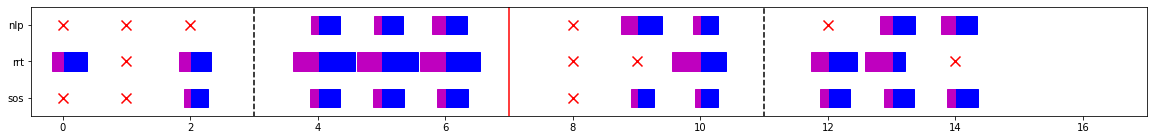

In [130]:
# Create figure and axes
fig,ax = plt.subplots(1, figsize=(20, 2))
plt.xlim(-.5, len(df)+5)
plt.ylim(-.5, 2.5)


RECT_HEIGHT = .5
def plot_rect(corner, length):
    corner = list(corner)
    c = 'b'
    if length < 0:
        length *= -1
        corner[0] -= length
        c = 'm'
        
    corner[1] -= RECT_HEIGHT / 2
    # Create a Rectangle patch
    rect = patches.Rectangle(corner, length, RECT_HEIGHT,
                             linewidth=1,
                             edgecolor=c,
                             facecolor=c)
    # Add the patch to the Axes
    ax.add_patch(rect)
    
def plot_cross(pos):
    plt.scatter([pos[0]], [pos[1]], s=100, marker='x', color='r')
    
keys = ('sos', 'rrt', 'nlp')
plt.yticks(np.arange(3), keys)
xoffset = 0

for row in df.iterrows():
    j, data = row
    if j in np.where(df['n'].diff().abs() > 0)[0]:
        print(j)
        x = j+xoffset
        c = 'k--'
        if j in np.where(df['speed_obs'].diff().abs() > 0)[0]:
            c = 'r-'
        plt.plot([x, x], [-3, 3], c)
        xoffset += 1

    for i, k in enumerate(keys):
        add_tv = '_tv' if data.speed_obs > .1 and k == 'rrt' else ''
        if data['valid_'+k]:
            plot_rect((j+xoffset, i), data['length_'+k+add_tv]/10)
            plot_rect((j+xoffset, i), -data['smooth_'+k+add_tv]*3)
        else:
            plot_cross((j+xoffset, i))
            
  

array([3, 6, 9])

In [22]:
static = df[df.speed_obs == 0.]
filt = static.valid_sos & static.valid_rrt #& static.valid_nlp
static[filt].groupby("n").mean().filter(like="length")

,length_sos,length_rrt,length_rrt_tv,length_nlp
n,,,,
2,2.854193,3.306723,2.885463,2.939043
3,3.538512,5.698805,3.405523,3.429461


In [23]:
dynamic = df[df.speed_obs == 1.]
filt = dynamic.valid_sos & dynamic.valid_rrt_tv #& dynamic.valid_nlp
dynamic[filt].groupby("n").mean().filter(like="length")

,length_sos,length_rrt,length_rrt_tv,length_nlp
n,,,,
2,2.826826,1.508883,3.756169,3.400180
3,3.542393,5.809145,4.638322,3.429623


In [131]:
df.groupby(["speed_obs", "n"]).mean().filter(like="valid")

valid_sos  valid_rrt  valid_rrt_tv  valid_nlp
speed_obs n                                               
0.0       2        0.6        0.4           0.5        0.0
          3        1.0        0.5           0.4        0.7
          4        1.0        0.6           0.0        0.8
1.0       2        0.5        0.3           0.5        0.2
          3        1.0        0.4           0.4        0.6
          4        1.0        0.7           0.0        0.9

In [148]:
print(df.groupby(["speed_obs", "n"]).mean().filter(like="valid").to_csv())

speed_obs,n,valid_sos,valid_rrt,valid_rrt_tv,valid_nlp
0.0,2,0.6,0.4,0.5,0.0
0.0,3,1.0,0.5,0.4,0.7
0.0,4,1.0,0.6,0.0,0.8
1.0,2,0.5,0.3,0.5,0.2
1.0,3,1.0,0.4,0.4,0.6
1.0,4,1.0,0.7,0.0,0.9



In [132]:
df.groupby("n").mean().filter(like="length")

,length_sos,length_rrt,length_rrt_tv,length_nlp
n,,,,
2,500.033020,3.091955,3.032258,3.285225
3,3.553015,5.608271,3.617648,3.517259
4,4.102095,7.568320,6.012681,4.157315


In [133]:
df.groupby("n").agg({"valid_sos": lambda u: ''.join(map(str, map(int, u)))})

,valid_sos
n,
2,00011110011110100011
3,11111111111111111111
4,11111111111111111111


In [141]:
df.groupby("n").agg({"valid_rrt": lambda u: ''.join(map(str, map(int, u)))})

,valid_rrt
n,
2,10001100000101101000
3,11111001000011001000
4,11111111001001010011
